<a href="https://colab.research.google.com/github/liangjieddd/Keras-Faster-RCNN/blob/master/anchors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
%matplotlib inline

In [0]:
Sample_raw_x = 128
Sample_raw_y = 128

rpn_stride = 8

Feature_size_X = Sample_raw_x / rpn_stride
Feature_size_Y = Sample_raw_y / rpn_stride

scales = [1,2,4]
ratios = [0.5,1,2]



In [0]:
def anchor(Feature_size_X,Feature_size_Y,rpn_stride,scales,ratios):
  scales,ratios = np.meshgrid(scales,ratios)
  scales,ratios = scales.flatten(),ratios.flatten()

  scalesX = scales * np.sqrt(ratios)
  scalesY = scales / np.sqrt(ratios)

  #anchor point flact
  ShiftX = np.arange(0,Feature_size_X) * rpn_stride
  ShiftY = np.arange(0,Feature_size_Y) * rpn_stride

  # anchor point origin image location
  ShiftX,ShiftY = np.meshgrid(ShiftX,ShiftY) # x,y is the center point

  # each anchor points need 9 scale,ratio
  centerX,anchorX = np.meshgrid(ShiftX,scalesX)
  centerY,anchorY = np.meshgrid(ShiftY,scalesY)
  print(centerX.shape)

  #Stack 各种尺寸，各种比例，对应各种长度
  anchor_center = np.stack([centerY,centerX],axis=2).reshape(-1,2)
  anchor_size = np.stack([anchorY,anchorX],axis=2).reshape(-1,2)

  # left-top right-bottom points
  boxes = np.concatenate([anchor_center-0.5*anchor_size,anchor_center+0.5*anchor_size],axis=1)
  return boxes




In [0]:
 anchors = anchor(Feature_size_X,Feature_size_Y,rpn_stride,scales,ratios)
 anchors.shape

(9, 256)


(2304, 4)

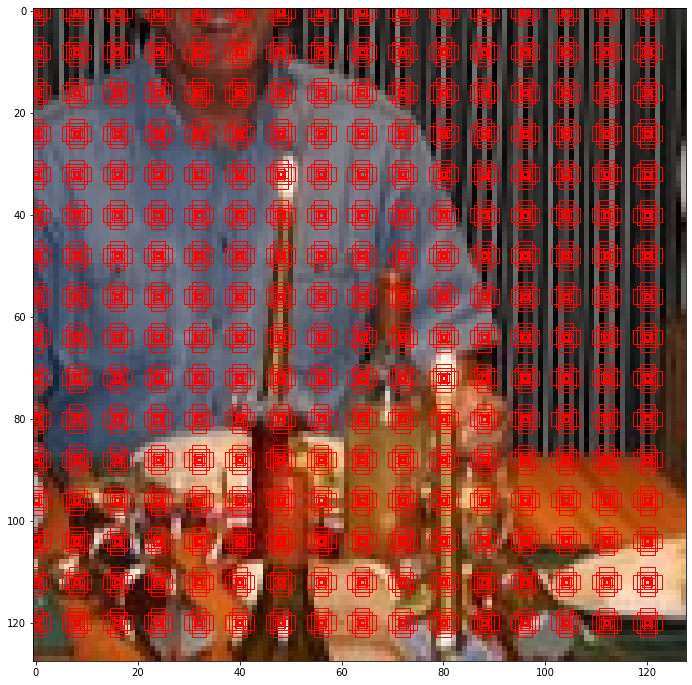

In [0]:
plt.figure(figsize=(12,12))
image = Image.open('/content/drive/My Drive/fasterrcnn/128.jpg')
plt.imshow(image)

axs = plt.gca() # get current axs

for i in range(anchors.shape[0]):
  box = anchors[i]
  rec = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],edgecolor='r',facecolor='none') 
  axs.add_patch(rec)